In [1]:
import numpy as np
import mxnet as mx
import mxnet.ndarray as nd
import mxnet.gluon as gluon
import gluonnlp
from mxnet.io import NDArrayIter
from mxnet import autograd

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from tqdm import tqdm

import json
import argparse
import sys

In [2]:
def load_data(trainFile, ctx = mx.cpu(0)):
    embed = gluonnlp.embedding.create(embedding_name='word2vec', source="GoogleNews-vectors-negative300")
    labels = []
    num_lines = sum(1 for line in open(trainFile))
    array = nd.ones((num_lines, SEQ_LENGTH, EMBEDDING_DIM), dtype='float32', ctx = ctx)
    print("Loading data: ")
    with open(trainFile) as f:
        for i, line in enumerate(f):
            l = json.loads(line)
            text = l['tokenized_text']
            label = l['type']
            labels.append(label)
            if len(text) > SEQ_LENGTH:
                text = text[0:SEQ_LENGTH]
            else:
                text.extend(['<PAD>' for i in range(0, SEQ_LENGTH - len(text))])
            array[i] = embed[text]
    return array, labels

def label_binarize(labels, ctx = mx.cpu(0)):
    lab = nd.zeros(len(labels), ctx = ctx)
    for i, label in enumerate(labels):
        if label == 'fake':
            lab[i] = 1
    return lab

In [3]:
SEQ_LENGTH = 10
EMBEDDING_DIM = 300
train_file = '/home/simon/Documents/TFE/Data/train2.json'

In [4]:
array, labels = load_data(train_file)

Loading data: 


In [5]:
array = array.asnumpy()

In [6]:
array = array.reshape(10240, -1)

In [26]:
pca = PCA(n_components=500)
pca_t = pca.fit_transform(array)

In [28]:
X_embedded = TSNE(n_components=2).fit_transform(pca_t)

In [34]:
import seaborn as sns

In [35]:
import matplotlib.pyplot as plt

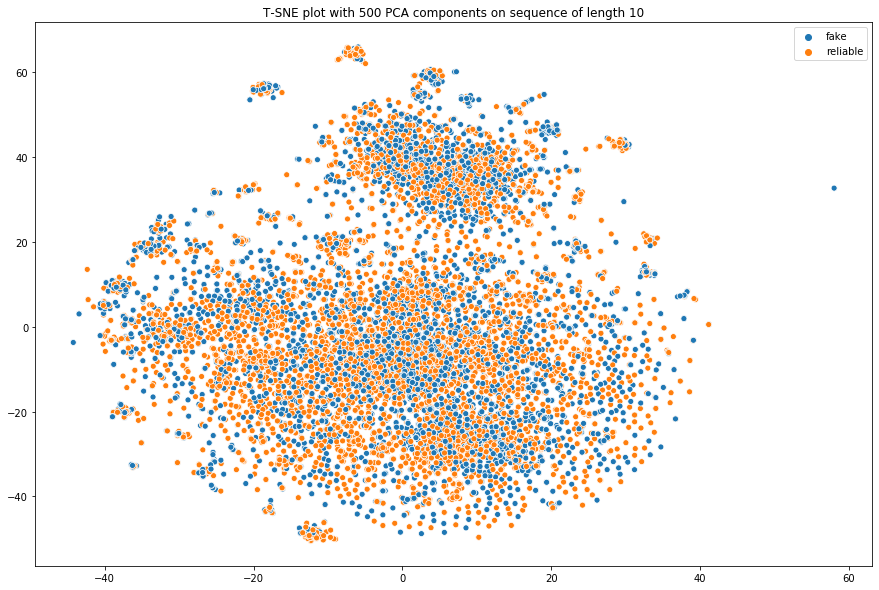

In [42]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize=(15,10))
axes.set(title="T-SNE plot with 500 PCA components on sequence of length 10")
sns.scatterplot(x = X_embedded[:,0], y = X_embedded[:,1], hue = labels, ax = axes)
plt.savefig('out/liar-liar-tsne_10_500.pdf')

In [17]:
X_embedded.shape

(10240, 2)

In [43]:
np.sum(pca.explained_variance_ratio_)

0.6086149